In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import *
import numpy as np
from IPython.display import Image
from scipy.integrate import odeint, ode

### Solutions for the numerical problems in chapter 1 of Classical Mechanics by Dr. Morin.

#### problem on page 13

In [49]:
# solve differential eqn at time=3

x=2
x1=0
t=3
eps_pow = 5
eps = 1*10**(-eps_pow)
print(eps)

for i in range(t*10**eps_pow):
    x2 = -5*x
    x = x + eps*x1
    x1 = x1 + eps*x2
    
print(x)

1e-05
1.8221987670839337


#### Problem 1.7

In [22]:
#%%timeit

g = 9.8
r=1
r1=0
th=3.1415/18
th1=0
t=10
eps_pow = 6
eps = 10**(-eps_pow)
tol = 10**(-4)

for i in range(t*10**eps_pow):
    if 2-r >= tol:
        r2 = 0.5*(r*th1**2 - g*(1-np.cos(th)))
        th2 = -(1/r)*(2*r1*th1 + g*np.sin(th))
        r = r + eps*r1
        r1 = r1 + eps*r2
        th = th + eps*th1
        th1 = th1 + eps*th2
    else:
        break
    
print(r,f"time = {i/10**eps_pow}s")

1.9999001088430959 time = 8.142259s


#### Exercise 1.17

In [21]:
g = 9.8
l = 1
th = np.pi/2
th1 = 0
t=10
eps_pow = 6
eps = 10**(-eps_pow)
tol = 10**(-4)

for i in range(t*10**eps_pow):
    if abs(th) > tol:
        th2 = -g*np.sin(th)/l
        th = th + eps*th1
        th1 = th1 + eps*th2
    else:
        break

print(th,f"time = {i/10**eps_pow}s")


9.580987248230337e-05 time = 0.592241s


#### Exercise 1.18

In [30]:
# First part
A = 1
x1 = 2
x = 0

t=101
eps_pow = 4
eps = 10**(-eps_pow)
tol = 10**(-5)
t_keep = [1, 10,100,]

for i in range(t*10**eps_pow):
    if len(t_keep) > 0:
        tval = i/10**eps_pow
        x2 = -A*x1
        x = x + eps*x1
        x1 = x1 + eps*x2
        if abs(tval - t_keep[0]) < tol:
            print(x,f"time = {i/10**eps_pow}s")
            t_keep.pop(0)
            print(t_keep)

1.2643514793434263 time = 1.0s
[10, 100]
1.9999092546074904 time = 10.0s
[100]
1.9999999999991587 time = 100.0s
[]


0.6932068364518821 time = 1.0s
[10, 100, 1000]
2.397880706633473 time = 10.0s
[100, 1000]
4.615076569785742 time = 100.0s
[1000]
6.90870561768916 time = 1000.0s
[]


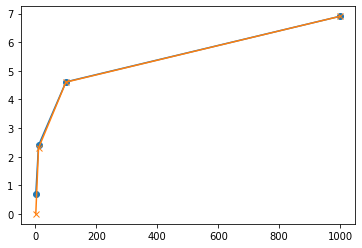

In [36]:
# second part
# First part
x1 = 1
x = 0
t = 1001
t_keep = [1, 10,100,1000]
t_keep1 = t_keep.copy()
val = []

for i in range(t*10**eps_pow):
    if len(t_keep) > 0:
        tval = i/10**eps_pow
        x2 = -A*x1**2
        x = x + eps*x1
        x1 = x1 + eps*x2
        if abs(tval - t_keep[0]) < tol:
            val.append(x)
            print(x,f"time = {i/10**eps_pow}s")
            t_keep.pop(0)
            print(t_keep)
            
plt.figure()
plt.plot(t_keep1, val,'-o')
plt.plot(t_keep1, np.log(t_keep1),'x-')